In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('customers_info.csv')
df2 = pd.read_csv('labels.csv')
df3 = pd.read_csv('loan_info.csv')

#Customer Dataset

In [3]:
df1.head()

,CUSTOMER_ID,SEX,CUSTOMER_OPEN_DATE,BIRTH_DATE,PROFESSION
0,1,M,2015-10-27,1986-03-24,EMPLOYEE
1,2,M,2015-11-29,1985-08-18,EMPLOYEE
2,3,F,2015-12-28,1985-07-02,HOUSEWIFE
3,4,M,2015-10-21,1979-01-01,Shop Owner
4,5,M,2015-11-02,1977-01-20,Shop Owner


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38396 entries, 0 to 38395
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CUSTOMER_ID         38396 non-null  int64 
 1   SEX                 38387 non-null  object
 2   CUSTOMER_OPEN_DATE  38396 non-null  object
 3   BIRTH_DATE          38386 non-null  object
 4   PROFESSION          38349 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [5]:
df1.isnull().sum()

,0
CUSTOMER_ID,0
SEX,9
CUSTOMER_OPEN_DATE,0
BIRTH_DATE,10
PROFESSION,47


In [6]:
df1.dropna(inplace=True)

In [7]:
df1.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
38391,False
38392,False
38393,False
38394,False


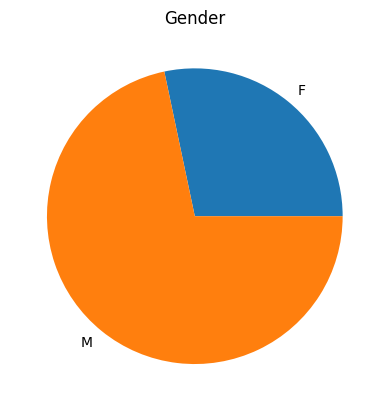

In [8]:
df1_grouped = df1.groupby('SEX')['CUSTOMER_ID'].count().reset_index()
plt.pie(df1_grouped['CUSTOMER_ID'], labels=df1_grouped['SEX'])
plt.title('Gender')
plt.show()

#Labels Dataset

In [9]:
df2.head()

,Unnamed: 0,ACCOUNT_NUMBER,CUSTOMER_ID,label
0,0,1,1,0
1,1,2,2,0
2,2,3,3,0
3,3,4,4,0
4,4,5,5,0


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39319 entries, 0 to 39318
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      39319 non-null  int64
 1   ACCOUNT_NUMBER  39319 non-null  int64
 2   CUSTOMER_ID     39319 non-null  int64
 3   label           39319 non-null  int64
dtypes: int64(4)
memory usage: 1.2 MB


In [11]:
df2.drop(columns=['Unnamed: 0'], inplace=True)

In [12]:
df2.isnull().sum()

,0
ACCOUNT_NUMBER,0
CUSTOMER_ID,0
label,0


In [13]:
df2.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
39314,False
39315,False
39316,False
39317,False


In [14]:
df2['ACCOUNT_NUMBER'] == df2['CUSTOMER_ID']

,0
0,True
1,True
2,True
3,True
4,True
...,...
39314,False
39315,False
39316,False
39317,False


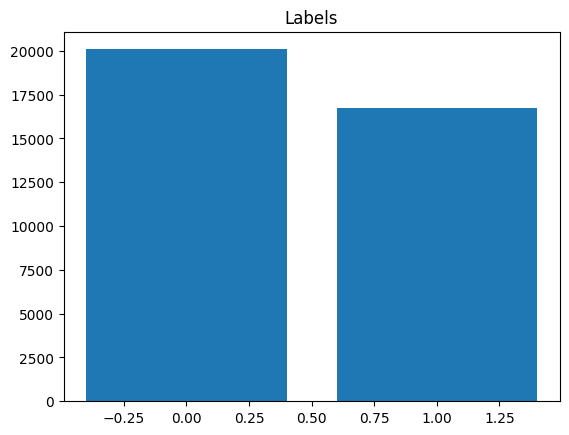

In [15]:
label = df2[['CUSTOMER_ID', 'label']].groupby('label').mean().reset_index()

plt.bar(label['label'], label['CUSTOMER_ID'])
plt.title('Labels')
plt.show()

#Loan Dataset

In [16]:
df3.head()

,CUSTOMER_ID,ACCOUNT_NUMBER,PROGRAM_NAME,LOAN_OPEN_DATE,EXPECTED_CLOSE_DATE,ORIGINAL_BOOKED_AMOUNT,CAR_TYPE
0,1,1,Auto Loans 50% Down Payment - Employed,11/25/2015,11/3/2020,91000.0,KIA
1,2,2,Pick Up and Small Trucks,12/8/2015,12/3/2017,35000.0,CARRY
2,3,3,Auto Loans 40% Down Payment - Employed,1/12/2016,1/3/2021,52500.0,CHEVROLET
3,4,4,Auto Loans 30% Down Payment - Self Employed,11/23/2015,10/3/2019,103000.0,MITSUBISHI
4,5,5,Auto Loans 30% Down Payment - Self Employed,11/23/2015,11/3/2018,94250.0,SEAT


In [17]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39597 entries, 0 to 39596
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CUSTOMER_ID             39597 non-null  int64  
 1   ACCOUNT_NUMBER          39597 non-null  int64  
 2   PROGRAM_NAME            39597 non-null  object 
 3   LOAN_OPEN_DATE          39597 non-null  object 
 4   EXPECTED_CLOSE_DATE     39597 non-null  object 
 5   ORIGINAL_BOOKED_AMOUNT  39589 non-null  float64
 6   CAR_TYPE                37295 non-null  object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.1+ MB


In [18]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_ID,39597.0,18964.683284,11152.824596,1.0,9285.0,18907.0,28604.0,38396.0
ACCOUNT_NUMBER,39597.0,19799.000000,11430.813641,1.0,9900.0,19799.0,29698.0,39597.0
ORIGINAL_BOOKED_AMOUNT,39589.0,92651.246681,61028.311069,15000.0,53500.0,77000.0,113000.0,2000000.0


In [19]:
df3.isnull().sum()

,0
CUSTOMER_ID,0
ACCOUNT_NUMBER,0
PROGRAM_NAME,0
LOAN_OPEN_DATE,0
EXPECTED_CLOSE_DATE,0
ORIGINAL_BOOKED_AMOUNT,8
CAR_TYPE,2302


In [20]:
df3.dropna(inplace=True)

In [21]:
df3.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
39591,False
39592,False
39594,False
39595,False


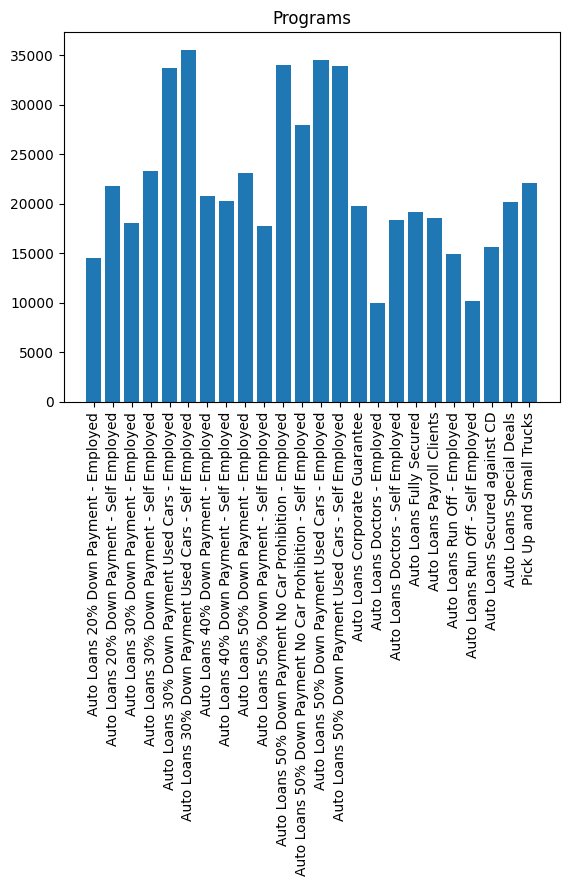

In [22]:
label = df3[['ACCOUNT_NUMBER', 'PROGRAM_NAME']].groupby('PROGRAM_NAME').mean().reset_index()

plt.bar(label['PROGRAM_NAME'], label['ACCOUNT_NUMBER'])
plt.title('Programs')
plt.xticks(rotation=90)
plt.show()